<a href="https://colab.research.google.com/github/Baldros/InfluencersSpreadsheet/blob/main/PlanilhaInfluencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 52.2 MB/s eta 0:00:00


# Download dos Dados:

Para iniciar a análise vamos baixar os dados. Aqui, eu vou usar os dados fornecidos na [matéria do jornal Estado de Minas](https://www.em.com.br/nacional/2025/01/7042897-planilha-expoe-piores-influenciadores-para-se-trabalhar.html), onde encontrei esses dados. O código aqui está escrito para trabalhar com um PDF que transformaremos em CSV, formato que pode ser lido por Excel. Então não há problema em achar essa planilha em outros lugares, desde que ela venha no formato PDF.

In [2]:
import requests

In [3]:
# URL do arquivo no Google Drive
download_url = f"https://drive.google.com/uc?id=1oq1nPOKMWAHCCdRzlRJZsaKFsgrrDmjH&export=download"

# Nome do arquivo local
output_file = "planilhaInfluencers.pdf"

try:
    # Fazer a solicitação ao Google Drive
    response = requests.get(download_url, stream=True)
    response.raise_for_status()  # Verificar se houve erro

    # Escrever o conteúdo em um arquivo local
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:  # Filtrar chunks vazios
                file.write(chunk)

    print(f"Arquivo baixado com sucesso: {output_file}")
except Exception as e:
    print(f"Erro ao baixar o arquivo: {e}")


Arquivo baixado com sucesso: planilhaInfluencers.pdf


# Tramento dos dados:

Baixado os dados, podemos então tratar-los, que aqui consistira ein extrair as informações do PDF, concatenar em um dataframe e tratar a tipologia dos dados para conseguir realizar visualizações gráficas.


In [6]:
from tabula import read_pdf
import pandas as pd

In [7]:
# Caminho do arquivo PDF
pdf_path = "/content/planilhaInfluencers.pdf"

# Extraindo tabelas do PDF
# 'lattice=True' funciona bem para tabelas com bordas; caso não funcione, tente 'stream=True'
tables = read_pdf(pdf_path, pages="all", lattice=True)

In [8]:
df = tables[0]

# Remover a linha 0 e redefinir a linha 1 como cabeçalho
df.columns = df.iloc[1]  # Define a linha 1 como cabeçalho
df = df[2:]  # Remove a linha 0

# Resetar o índice do DataFrame
df.reset_index(drop=True, inplace=True)

# Exibir o DataFrame ajustado
display(df)

1,Carimbo de data/hora,Nome do influencer,Qual o @ (identifica a rede),Qual a nota desse influ?,Quando trabalhou com esse influ?,Como foi trabalhar com esse influ?,Conselho p/ colegas da área
0,11/10/24 18:50,Gil do Vigor,@gildovigor,10,jun.-21,"No começo ele é meio tímido, mas vai\rse solta...",NaN
1,11/11/24 11:44,Mohamad (ex-\rmasterchef),@mohindi,4,2023,"Um caos, simplesmente impossível\rconseguir ag...",Existem outros influenciadores de\rgastronomia...
2,11/11/24 11:52,Gabriela Bailas (Física e\rafins),@bibibailas,8,abr.-24,"A entrega em si foi boa, entregou o que\rfoi c...","Tenha paciência que o conteúdo\rserá bom, a as..."
3,11/11/24 14:52,Paola Antonini,@paola_antonini - IG,1,segundo semestre de 2024,terrível! ela não cumpre prazos e mente\rdesca...,"para quem for trabalhar com ela,\rtenha muuuuu..."
4,11/11/24 18:06,Lara Cunha,@pear.lara,9,fev.-24,Uma grande querida! Traz ideias legais\rnas re...,Precisando de influ de lifestyle pra\rpúblico ...
5,11/11/24 18:11,Lucas Barreto,@barretovs - ig,6,2023,"Pressão mais baixa que a minha, era\rdifícil e...",Envie o direcional com roteiro já\raprovado na...


In [9]:
for page in range(1,len(tables)):
  try:
    df_temp = tables[page].copy()
    if df_temp.shape[1] == 8:
      df_temp.drop("Unnamed: 0", axis=1, inplace = True)

    header_index = df_temp.shape[0]+1
    df_temp.loc[header_index] = df_temp.columns
    df_temp.columns = df.columns
    df_temp.reset_index(drop=True, inplace=True)

    df = pd.concat([df, df_temp]).copy()
    df.reset_index(drop=True, inplace=True)

  except Exception as e:
    print(f"Erro nessa porra {e}")
    print(page)

In [ ]:
import numpy as np

In [13]:
for i in range(len(df)):
    try:
        # Tentando converter o valor para inteiro
        df.loc[i, 'Qual a nota desse influ?'] = int(df.loc[i, 'Qual a nota desse influ?'])
    except ValueError:
        # Se der erro, substitui por NaN
        df.loc[i, 'Qual a nota desse influ?'] = np.nan

In [14]:
df.info("columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Carimbo de data/hora                474 non-null    object
 1   Nome do influencer                  474 non-null    object
 2   Qual o @ (identifica a rede)        474 non-null    object
 3   Qual a nota desse influ?            474 non-null    object
 4   Quando trabalhou com esse influ?    473 non-null    object
 5   Como foi trabalhar com esse influ?  478 non-null    object
 6   Conselho p/ colegas da área         411 non-null    object
dtypes: object(7)
memory usage: 26.3+ KB


In [15]:
# Dataframe completo
df

1,Carimbo de data/hora,Nome do influencer,Qual o @ (identifica a rede),Qual a nota desse influ?,Quando trabalhou com esse influ?,Como foi trabalhar com esse influ?,Conselho p/ colegas da área
0,11/10/24 18:50,Gil do Vigor,@gildovigor,10,jun.-21,"No começo ele é meio tímido, mas vai\rse solta...",NaN
1,11/11/24 11:44,Mohamad (ex-\rmasterchef),@mohindi,4,2023,"Um caos, simplesmente impossível\rconseguir ag...",Existem outros influenciadores de\rgastronomia...
2,11/11/24 11:52,Gabriela Bailas (Física e\rafins),@bibibailas,8,abr.-24,"A entrega em si foi boa, entregou o que\rfoi c...","Tenha paciência que o conteúdo\rserá bom, a as..."
3,11/11/24 14:52,Paola Antonini,@paola_antonini - IG,1,segundo semestre de 2024,terrível! ela não cumpre prazos e mente\rdesca...,"para quem for trabalhar com ela,\rtenha muuuuu..."
4,11/11/24 18:06,Lara Cunha,@pear.lara,9,fev.-24,Uma grande querida! Traz ideias legais\rnas re...,Precisando de influ de lifestyle pra\rpúblico ...
...,...,...,...,...,...,...,...
473,1/23/25 14:18,Gil do Vigor,gildovigor,9,2022,"Ele entrega MUITO resultado, tem uma\rbase bem...",NaN
474,1/23/25 14:18,Raquele Cardozo,raquele.cardozo,10,2024,"Ela é fofa, simpática e educada. Muito\rprofis...",NaN
475,1/23/25 14:16,Marco Luque,marcoluque - ig,10,2024 os 2 semestres,Cara incrível. Entrega tudo e mais um\rpouco d...,podem contratar
476,1/23/25 14:18,Luiza Quintela,@luizaquintela,10,2024,"Luiza é maravilhosa. Extremamente\rparceira, m...",Contratem a diva da dermato\rporque é sucesso ...


In [16]:
# Salvando DataFrame:
df.to_csv("influenciadores.csv", index=False)

# Visualizações:

Iniciando o processo de análise exploratória dos dados, vamos construir algumas visualizações para entender o conjunto de dados e matar nossa curiosidade sobre as informações da planilha. 😉

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
for key in df.keys():
  print(key)

Carimbo de data/hora
Nome do influencer
Qual o @ (identifica a rede)
Qual a nota desse influ?
Quando trabalhou com esse influ?
Como foi trabalhar com esse influ?
Conselho p/ colegas da área


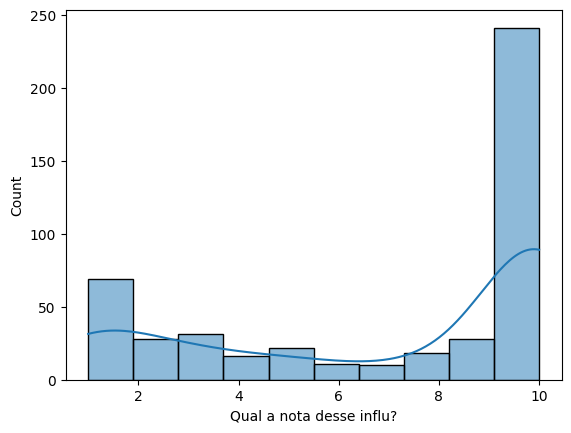

In [20]:
sns.histplot(df["Qual a nota desse influ?"], bins=10, kde=True);

In [21]:
df["Nome do influencer"].value_counts()

,count
Nome do influencer,
Malu Borges,7
Bagi,4
Jade Picon,4
Caio Castro,4
Gil do Vigor,3
...,...
samanta alves,1
Camila Foletto,1
Matheus,1


In [69]:
def plot_influencer(influencer):
    # Filtrar o DataFrame para o influenciador específico
    df_temp = df[df["Nome do influencer"] == influencer]

    # Contar o número de vezes que o influenciador aparece
    num_ocorrencias = len(df_temp)

    # Criar o gráfico de barras
    ax = sns.countplot(x="Qual a nota desse influ?", data=df_temp)

    # Adicionar uma linha pontilhada para cada barra, baseada no valor da barra
    for p in ax.patches:
        # Obtendo a altura de cada barra
        altura_barra = p.get_height()

        # Desenhando a linha pontilhada na altura da barra
        ax.axhline(y=altura_barra, color='red', linestyle='--')

    # Personalizando o gráfico
    plt.title(f"Distribuição das notas para {influencer}")
    plt.xlabel("Nota(s) que o influenciador recebeu")
    plt.ylabel("Contagem")

    # Adicionar texto indicando as ocorrências fora do gráfico
    plt.gcf().text(
        1.1, 0.5, f"Número de Registros: {num_ocorrencias}",
        fontsize=10, color='black',
        verticalalignment='center', transform=plt.gca().transAxes
    )

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

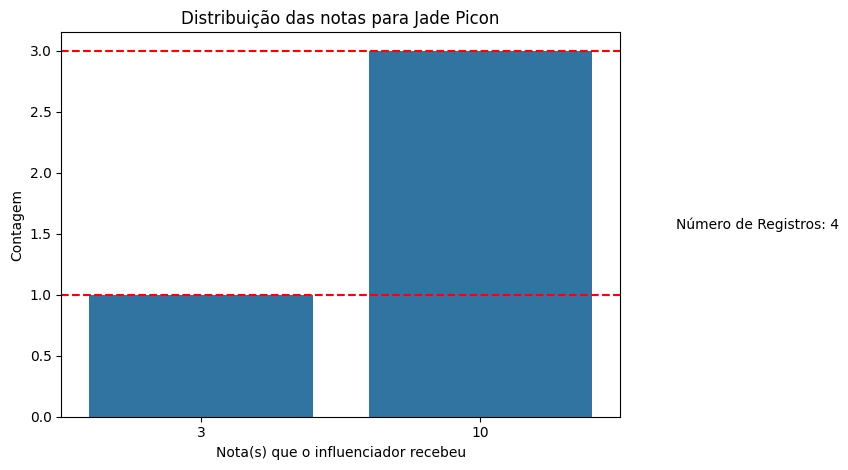

In [70]:
# Avaliação gráfica da pontuação:
plot_influencer("Jade Picon")

In [38]:
def experiencia_com_influencer(influencer, tratamento = "\n"):

  textos = []
  qtd_experiencias = df[df["Nome do influencer"]==influencer]["Como foi trabalhar com esse influ?"].shape[0]
  qtd_conselhos = df[df["Nome do influencer"]==influencer]["Conselho p/ colegas da área"].shape[0]

  for i in range(qtd_experiencias):
    try:
      textos.append("\033[1m* Experiência:\033[0m\n" + df[df["Nome do influencer"]==influencer]["Como foi trabalhar com esse influ?"].iloc[i])
    except:
      pass

    try:
      textos.append("\033[1m* Conselho para Colegas:\033[0m\n" + df[df["Nome do influencer"]==influencer]["Conselho p/ colegas da área"].iloc[i])
    except:
      pass

  for texto in textos:
    texto_limpo = texto.replace('\r', tratamento) # Removendo todos os caracteres \r
    print(texto_limpo,"\n")

In [39]:
# Comentários sobre o influencer escolhido:
experiencia_com_influencer("Malu Borges")

* Experiência:
TERRIVELLLL não trabalha com roteiro,
não respeita nenhum direcional da
marca e nem segue briefing nenhum,
ela simplesmente faz o que ela quer. O
MAIOR terror da minha carreira foi
trabalhar com essa mulher 

* Conselho para Colegas:
deixem essa maluca flopar, não
contratem pra NADA 

* Experiência:
Ah, acho que é muito cara, muito hype e
pouca entrega. Para piorar a gata é
chatíssima 

* Experiência:
Péssima experiência, não aceita 

* Conselho para Colegas:
Ta na hora de dar um gelo nessas 

* Experiência:
Horrível, chata demais, não aceita
refação, não segue os briefings e do's e
don'ts, se preocupa apenas em fazer um
conteúdo que viralize na comunidade
dela, mas não está nem aí para as
necessidades da marca que a contratou
e do briefing que recebeu 

* Conselho para Colegas:
Não contratem! Chega de dar
palco pra quem não está nem aí
pro trabalho, ela é zero
profissional 

* Experiência:
Simplesmente IN SU POR TÁ VEL. Não
segue briefing, não faz roteiro, não
segue nem

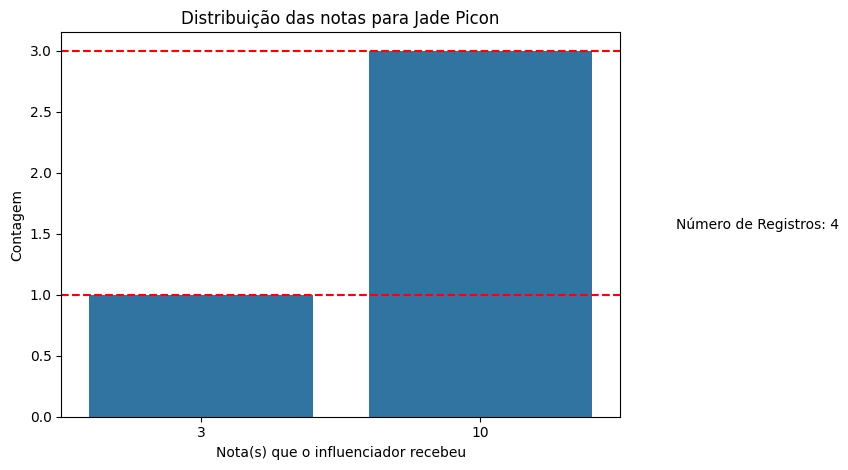

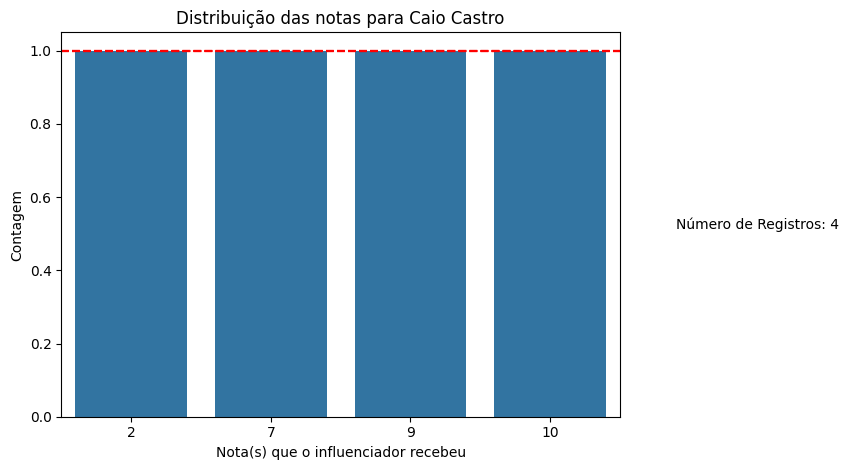

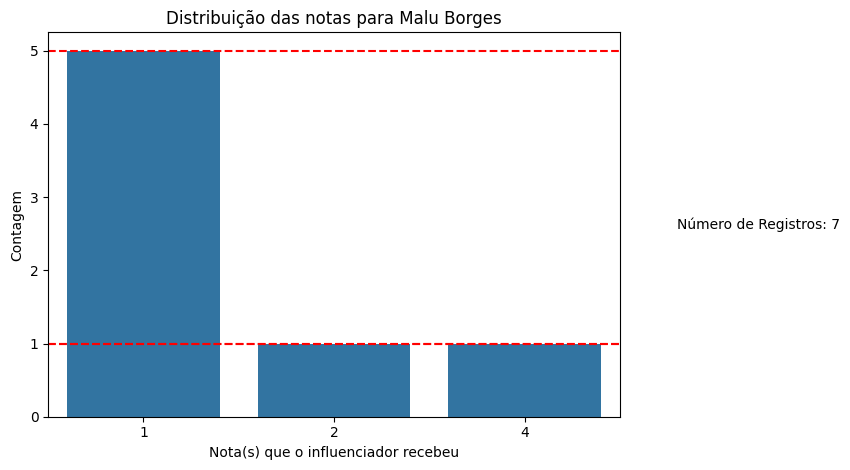

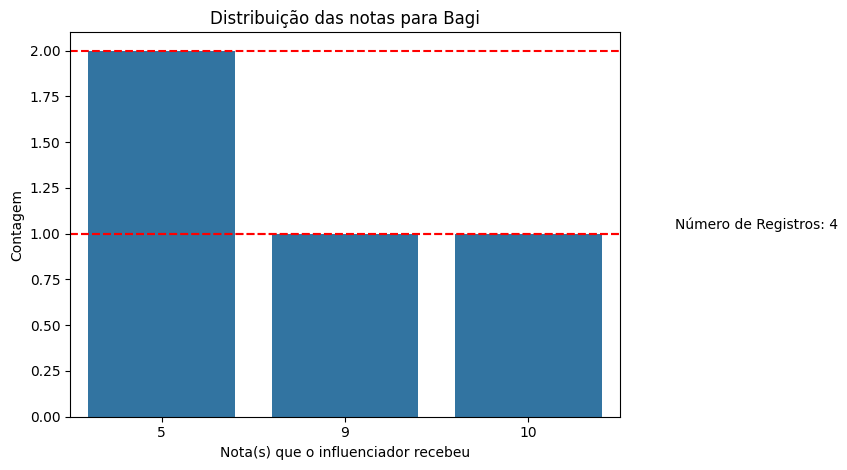

In [71]:
for influencer in df["Nome do influencer"].unique():
  if df[df["Nome do influencer"] == influencer].shape[0] > 3:
    plot_influencer(influencer)

In [74]:
# Calcular soma e contagem de notas por influenciador
tabela = df.groupby("Nome do influencer", as_index=False).agg(
    Pontuação_Total=("Qual a nota desse influ?", "sum"),
    Ocorrências=("Qual a nota desse influ?", "count")
)

# Calcular a pontuação média
#tabela["Pontuação Média"] = tabela["Pontuação_Total"] / tabela["Ocorrências"]

# Ordenando tabela:
tabela.sort_values("Pontuação_Total",inplace=True)
tabela.reset_index(drop=True, inplace=True)

display(tabela)

,Nome do influencer,Pontuação_Total,Ocorrências
0,Nathalia Barros,1,1
1,Mitico e Igão,1,1
2,Stefani Bays,1,1
3,Sofia Menegon,1,1
4,Bel,1,1
...,...,...,...
407,Erick Mafra,28,3
408,Bagi,29,4
409,Gil do Vigor,29,3
410,Nicole Bahls,30,3


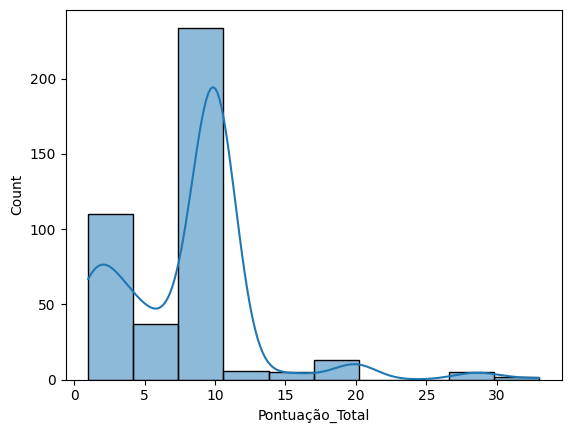

In [50]:
sns.histplot(tabela["Pontuação_Total"], bins=10, kde=True);

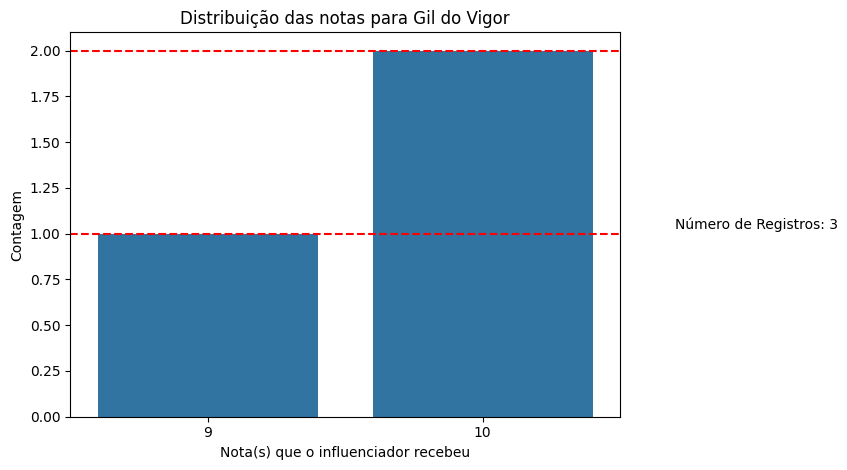

In [76]:
plot_influencer("Gil do Vigor")